In [ ]:
# started 8-14-2025
# https://www.kaggle.com/datasets/rtatman/188-million-us-wildfires
# Tatham, Rachael. 2025. 1.88 Million US Wildfires. Kaggle. Accessed August 14,
#  2025. https://www.kaggle.com/datasets/rtatman/188-million-us-wildfires.


In [44]:
import sqlite3
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt


from meteostat import Point, Daily
from datetime import datetime, timedelta
import time
import requests

In [ ]:

conn = sqlite3.connect("FPA_FOD_20170508.sqlite")

df = pd.read_sql_query("""
    SELECT OBJECTID,
           FIRE_YEAR,
           DISCOVERY_DATE,
           DISCOVERY_DOY,
           CONT_DATE,
           CONT_DOY,
           FIRE_SIZE,
           FIRE_SIZE_CLASS,
           STATE,
           STAT_CAUSE_CODE,
           STAT_CAUSE_DESCR,
           LATITUDE,
           LONGITUDE,
           FIPS_NAME AS COUNTY,
           FIRE_NAME
    FROM Fires
""", conn)

conn.close()

In [46]:
# df.head()
# df.to_csv("fires.csv", index=False)

In [47]:
df = pd.read_csv("fires.csv")
df.head()

,OBJECTID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,STATE,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,COUNTY,FIRE_NAME
0,1,2005,2453403.5,33,2453403.5,33.0,0.10,A,CA,9.0,Miscellaneous,40.036944,-121.005833,Plumas,FOUNTAIN
1,2,2004,2453137.5,133,2453137.5,133.0,0.25,A,CA,1.0,Lightning,38.933056,-120.404444,Placer,PIGEON
2,3,2004,2453156.5,152,2453156.5,152.0,0.10,A,CA,5.0,Debris Burning,38.984167,-120.735556,El Dorado,SLACK
3,4,2004,2453184.5,180,2453189.5,185.0,0.10,A,CA,1.0,Lightning,38.559167,-119.913333,Alpine,DEER
4,5,2004,2453184.5,180,2453189.5,185.0,0.10,A,CA,1.0,Lightning,38.559167,-119.933056,Alpine,STEVENOT


In [48]:
df.shape

(1880465, 15)

In [49]:
num_socal = ((df["STATE"] == "CA") & (df["LATITUDE"] < 35) & (df["FIRE_SIZE"] > 0)).sum()
num_socal
# num of fires in socal

np.int64(45820)

In [50]:
socal_fires = df[(df["STATE"] == "CA") & (df["LATITUDE"] < 35) & (df["FIRE_SIZE"] > 0)]

In [51]:
socal_fires = socal_fires.sample(frac=1, random_state=5).reset_index(drop=True)
socal_fires.head()

,OBJECTID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,STATE,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,COUNTY,FIRE_NAME
0,1641655,2013,2456494.5,202,2456494.5,202.0,0.10,A,CA,1.0,Lightning,34.160278,-116.797222,San Bernardino,HEART
1,1129783,1992,2448875.5,254,NaN,NaN,1.00,B,CA,4.0,Campfire,33.316944,-116.558889,NaN,LOST #2
2,1481242,2011,2455879.5,318,NaN,NaN,0.01,A,CA,7.0,Arson,34.161566,-117.361663,San Bernardino,RESERVOIR DR / GRAY ST
3,202155,1992,2448870.5,249,2448870.5,249.0,1.00,B,CA,2.0,Equipment Use,32.733400,-114.650800,NaN,YUMA ROAD
4,1616888,2012,2456145.5,219,NaN,NaN,0.50,B,CA,9.0,Miscellaneous,33.411105,-117.042621,San Diego,MAGEE RD PALA 3


In [52]:
socal_fires.shape

(45820, 15)

In [53]:
#socal_fires["DISCOVERY_DATE"] = pd.to_datetime(socal_fires["DISCOVERY_DATE"], origin="julian", unit="D")
socal_fires.head()

,OBJECTID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,STATE,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,COUNTY,FIRE_NAME
0,1641655,2013,2456494.5,202,2456494.5,202.0,0.10,A,CA,1.0,Lightning,34.160278,-116.797222,San Bernardino,HEART
1,1129783,1992,2448875.5,254,NaN,NaN,1.00,B,CA,4.0,Campfire,33.316944,-116.558889,NaN,LOST #2
2,1481242,2011,2455879.5,318,NaN,NaN,0.01,A,CA,7.0,Arson,34.161566,-117.361663,San Bernardino,RESERVOIR DR / GRAY ST
3,202155,1992,2448870.5,249,2448870.5,249.0,1.00,B,CA,2.0,Equipment Use,32.733400,-114.650800,NaN,YUMA ROAD
4,1616888,2012,2456145.5,219,NaN,NaN,0.50,B,CA,9.0,Miscellaneous,33.411105,-117.042621,San Diego,MAGEE RD PALA 3


In [54]:
socal_fires["DISCOVERY_DATE"].isnull().values.any()

np.False_

In [55]:
socal_fires["FIRE_SIZE"].isnull().values.any()

np.False_

In [56]:
socal_fires["CONT_DATE"].isnull().values.any()

np.True_

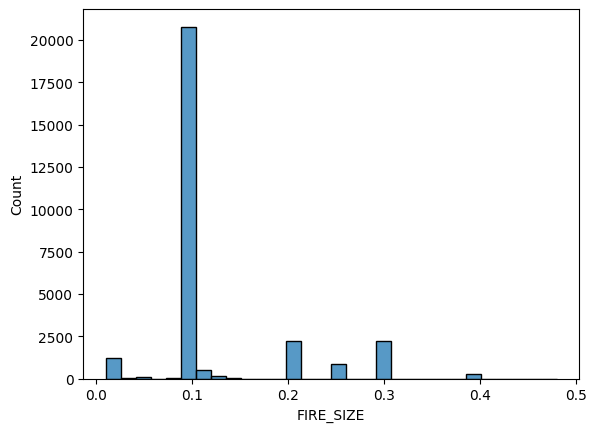

In [57]:
sns.histplot(
    data=socal_fires[socal_fires["FIRE_SIZE"] < 0.5],
    x="FIRE_SIZE",
    bins=30,
    kde=False
)
plt.show()

In [58]:
socal_fires_sampled = socal_fires.sample(frac=0.01, random_state=5).reset_index(drop=True)
socal_fires_sampled.head()

,OBJECTID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,STATE,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,COUNTY,FIRE_NAME
0,1126780,1992,2448807.5,186,NaN,NaN,0.1,A,CA,9.0,Miscellaneous,34.828889,-114.616944,NaN,ALLSTAR
1,13864,2006,2453924.5,189,2453924.5,189.0,0.1,A,CA,1.0,Lightning,34.074722,-116.863333,San Bernardino,HALFWAY
2,1641613,2013,2456418.5,126,2456418.5,126.0,0.1,A,CA,4.0,Campfire,33.150556,-116.891944,San Diego,OROSCO
3,1457571,2011,2455762.5,201,2455762.5,201.0,2.0,B,CA,2.0,Equipment Use,34.345278,-116.934722,NaN,CRYSTAL
4,69226,1994,2449570.5,218,2449570.5,218.0,0.1,A,CA,2.0,Equipment Use,34.171667,-117.896667,NaN,MANURE


In [59]:
socal_fires_sampled.shape

(458, 15)

In [60]:
def julian_to_date(jd):
    if isinstance(jd, float):  # Julian float
        unix_epoch = datetime(1970, 1, 1)
        dt = unix_epoch + timedelta(days=(jd - 2440587.5))
        return dt.date()
    elif isinstance(jd, pd.Timestamp):  # Already datetime
        return jd.date()
    else:
        return None


In [ ]:
def fetch_weather_open_meteo(socal_fires):


    weather_data = []

    for idx, row in socal_fires.iterrows():
        try:
            lat = float(row["LATITUDE"])
            lon = float(row["LONGITUDE"])
            date = julian_to_date(row["DISCOVERY_DATE"])
            if date is None:
                raise ValueError("Invalid date")

            # 1 day window
            start_date = str(date - pd.Timedelta(days=1))
            end_date = str(date + pd.Timedelta(days=1))

            url = (
                "https://archive-api.open-meteo.com/v1/archive?"
                f"latitude={lat}&longitude={lon}"
                f"&start_date={start_date}&end_date={end_date}"
                "&daily=temperature_2m_max,temperature_2m_min,precipitation_sum,windspeed_10m_max"
                "&timezone=America/Los_Angeles"
            )

            resp = requests.get(url, timeout=10)
            data = resp.json()

            if "daily" in data and len(data["daily"]["time"]) > 0:
                temp_max_C = data["daily"]["temperature_2m_max"][0]
                temp_min_C = data["daily"]["temperature_2m_min"][0]
                precip_mm = data["daily"]["precipitation_sum"][0]
                wind_kmh = data["daily"]["windspeed_10m_max"][0]

                weather_data.append({
                    "OBJECTID": row["OBJECTID"],
                    # Metric
                    "temp_max_C": temp_max_C,
                    "temp_min_C": temp_min_C,
                    "precip_mm": precip_mm,
                    "windspeed_kmh": wind_kmh,
                    # Imperial
                    "temp_max_F": temp_max_C * 9/5 + 32 if temp_max_C is not None else None,
                    "temp_min_F": temp_min_C * 9/5 + 32 if temp_min_C is not None else None,
                    "precip_in": precip_mm / 25.4 if precip_mm is not None else None,
                    "windspeed_mph": wind_kmh / 1.609 if wind_kmh is not None else None
                })
            else:
                weather_data.append({
                    "OBJECTID": row["OBJECTID"],
                    "temp_max_C": None, "temp_min_C": None, "precip_mm": None, "windspeed_kmh": None,
                    "temp_max_F": None, "temp_min_F": None, "precip_in": None, "windspeed_mph": None
                })

        except Exception as e:
            print(f"Error for OBJECTID {row['OBJECTID']}: {e}")
            weather_data.append({
                "OBJECTID": row["OBJECTID"],
                "temp_max_C": None, "temp_min_C": None, "precip_mm": None, "windspeed_kmh": None,
                "temp_max_F": None, "temp_min_F": None, "precip_in": None, "windspeed_mph": None
            })

        time.sleep(0.05)  # polite pause

    return pd.DataFrame(weather_data)

In [62]:
df_weather = fetch_weather_open_meteo(socal_fires_sampled.head(10))

In [63]:
df_weather.head()

,OBJECTID,temp_max_C,temp_min_C,precip_mm,windspeed_kmh,temp_max_F,temp_min_F,precip_in,windspeed_mph
0,1126780,40.0,25.5,0.0,15.9,104.00,77.90,0.000000,9.881914
1,13864,25.3,13.7,0.3,10.0,77.54,56.66,0.011811,6.215040
2,1641613,18.3,11.2,0.5,17.8,64.94,52.16,0.019685,11.062772
3,1457571,31.6,17.4,0.0,11.8,88.88,63.32,0.000000,7.333748
4,69226,39.0,21.0,0.0,10.7,102.20,69.80,0.000000,6.650093


In [64]:
def count_api_calls(socal_fires):


    # Round lat/lon
    socal_fires["lat_round"] = socal_fires["LATITUDE"].round(1)
    socal_fires["lon_round"] = socal_fires["LONGITUDE"].round(1)

    # Convert discovery date
    socal_fires["date"] = socal_fires["DISCOVERY_DATE"].apply(julian_to_date)

    # Drop bad rows & count unique triplets
    unique_calls = socal_fires.dropna(subset=["date"]).drop_duplicates(
        subset=["lat_round", "lon_round", "date"]
    )

    print(f"Estimated API calls needed: {len(unique_calls)}")
    return len(unique_calls)

In [65]:
count_api_calls(socal_fires)

Estimated API calls needed: 42172


42172

In [68]:
socal_fires.head()

,OBJECTID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,STATE,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,COUNTY,FIRE_NAME,lat_round,lon_round,date
0,1641655,2013,2456494.5,202,2456494.5,202.0,0.10,A,CA,1.0,Lightning,34.160278,-116.797222,San Bernardino,HEART,34.2,-116.8,2013-07-21
1,1129783,1992,2448875.5,254,NaN,NaN,1.00,B,CA,4.0,Campfire,33.316944,-116.558889,NaN,LOST #2,33.3,-116.6,1992-09-10
2,1481242,2011,2455879.5,318,NaN,NaN,0.01,A,CA,7.0,Arson,34.161566,-117.361663,San Bernardino,RESERVOIR DR / GRAY ST,34.2,-117.4,2011-11-14
3,202155,1992,2448870.5,249,2448870.5,249.0,1.00,B,CA,2.0,Equipment Use,32.733400,-114.650800,NaN,YUMA ROAD,32.7,-114.7,1992-09-05
4,1616888,2012,2456145.5,219,NaN,NaN,0.50,B,CA,9.0,Miscellaneous,33.411105,-117.042621,San Diego,MAGEE RD PALA 3,33.4,-117.0,2012-08-06


In [69]:
socal_fires.shape

(45820, 18)

In [70]:
socal_fires_present = socal_fires[socal_fires["FIRE_YEAR"] > 2010].reset_index(drop=True)

In [71]:
count_api_calls(socal_fires_present)

Estimated API calls needed: 9287


9287

In [72]:
socal_fires_present.shape

(9859, 18)

In [73]:
num_large_fires = (socal_fires_present["FIRE_SIZE"] > 1).sum()
num_large_fires

np.int64(1313)

In [ ]:
#separate large and small fires
large_fires = socal_fires_present[socal_fires_present["FIRE_SIZE"] > 1]
small_fires = socal_fires_present[socal_fires_present["FIRE_SIZE"] <= 1]

#randomly sample 40% of the small fires
small_fires_sampled = small_fires.sample(frac=0.4, random_state=5)

#combine back into one df
socal_fires_downsampled = pd.concat([large_fires, small_fires_sampled]).reset_index(drop=True)

socal_fires_downsampled.shape

(4731, 18)

In [76]:
count_api_calls(socal_fires_downsampled)

Estimated API calls needed: 4597


4597

In [ ]:
socal_fires_downsampled = socal_fires_downsampled.sample(n=500, random_state=5).reset_index(drop=True)

Estimated API calls needed: 499


499

In [ ]:
#socal_weather = fetch_weather_open_meteo(socal_fires_downsampled)

In [82]:
socal_weather = pd.read_csv("socal_fires_downsampled_weather.csv")
socal_weather.head()

,OBJECTID,temp_max_C,temp_min_C,precip_mm,windspeed_kmh,temp_max_F,temp_min_F,precip_in,windspeed_mph
0,1792967,19.6,6.7,0.0,10.2,67.28,44.06,0.000000,6.339341
1,1509069,18.5,9.6,0.0,14.3,65.30,49.28,0.000000,8.887508
2,1509724,29.4,17.4,0.0,8.9,84.92,63.32,0.000000,5.531386
3,1654379,34.7,22.2,0.0,5.7,94.46,71.96,0.000000,3.542573
4,1792965,28.8,14.5,0.8,7.4,83.84,58.10,0.031496,4.599130


In [80]:
socal_weather.to_csv("socal_fires_downsampled_weather.csv", index=False)

In [83]:
# Separate large and small fires
large_fires = socal_fires_present[socal_fires_present["FIRE_SIZE"] > 1]
small_fires = socal_fires_present[socal_fires_present["FIRE_SIZE"] <= 1]

# Randomly sample 40% of the small fires
small_fires_sampled = small_fires.sample(frac=0.4, random_state=5)

# Combine back into one DataFrame
socal_fires_small = pd.concat([large_fires, small_fires_sampled]).reset_index(drop=True)

socal_fires_small.shape

(4731, 18)

In [84]:
full_socal_weather = fetch_weather_open_meteo(socal_fires_small)

Error for OBJECTID 1643831: HTTPSConnectionPool(host='archive-api.open-meteo.com', port=443): Read timed out. (read timeout=10)
Error for OBJECTID 1788908: HTTPSConnectionPool(host='archive-api.open-meteo.com', port=443): Read timed out. (read timeout=10)
Error for OBJECTID 1878839: HTTPSConnectionPool(host='archive-api.open-meteo.com', port=443): Read timed out. (read timeout=10)


In [85]:
full_socal_weather.head()

,OBJECTID,temp_max_C,temp_min_C,precip_mm,windspeed_kmh,temp_max_F,temp_min_F,precip_in,windspeed_mph
0,1626175,30.2,16.2,0.0,11.7,86.36,61.16,0.000000,7.271597
1,1511043,32.6,22.0,0.2,21.3,90.68,71.60,0.007874,13.238036
2,1643873,31.4,22.7,1.3,11.4,88.52,72.86,0.051181,7.085146
3,1572940,31.2,19.3,0.0,11.5,88.16,66.74,0.000000,7.147296
4,1457136,19.6,5.0,0.0,15.5,67.28,41.00,0.000000,9.633313


In [ ]:
full_socal_weather.isnull().any(axis=1).sum()

0       False
1       False
2       False
3       False
4       False
        ...  
4726    False
4727    False
4728    False
4729    False
4730    False
Length: 4731, dtype: bool

In [89]:
#full_socal_weather.to_csv("full_socal_fires_weather.csv", index=False)
socal_fires_small.to_csv("full_socal_fires.csv", index=False)

In [103]:
ca_fires = pd.read_csv("full_socal_fires.csv")
ca_fires_weather = pd.read_csv("full_socal_fires_weather.csv")

In [94]:
ca_fires.head()

,OBJECTID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,STATE,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,COUNTY,FIRE_NAME,lat_round,lon_round,date
0,1626175,2012,2456115.5,189,NaN,NaN,2.0,B,CA,9.0,Miscellaneous,33.722204,-116.944564,Riverside,CREST,33.7,-116.9,2012-07-07
1,1511043,2011,2455769.5,208,NaN,NaN,30.0,C,CA,13.0,Missing/Undefined,34.690100,-117.800700,Los Angeles,NaN,34.7,-117.8,2011-07-27
2,1643873,2013,2456537.5,245,2456537.5,245.0,3.0,B,CA,1.0,Lightning,33.719970,-117.350530,Riverside,LINDELL,33.7,-117.4,2013-09-02
3,1572940,2012,2456203.5,277,2456203.5,277.0,15.0,C,CA,13.0,Missing/Undefined,34.187940,-119.000990,NaN,HOWARD,34.2,-119.0,2012-10-03
4,1457136,2011,2455589.5,28,2455589.5,28.0,1.5,B,CA,2.0,Equipment Use,34.439167,-118.193333,NaN,ACTON,34.4,-118.2,2011-01-28


In [97]:
ca_fires.shape

(4731, 18)

In [96]:
ca_fires_weather.head()

,OBJECTID,temp_max_C,temp_min_C,precip_mm,windspeed_kmh,temp_max_F,temp_min_F,precip_in,windspeed_mph
0,1626175,30.2,16.2,0.0,11.7,86.36,61.16,0.000000,7.271597
1,1511043,32.6,22.0,0.2,21.3,90.68,71.60,0.007874,13.238036
2,1643873,31.4,22.7,1.3,11.4,88.52,72.86,0.051181,7.085146
3,1572940,31.2,19.3,0.0,11.5,88.16,66.74,0.000000,7.147296
4,1457136,19.6,5.0,0.0,15.5,67.28,41.00,0.000000,9.633313


In [98]:
ca_fires_weather.shape

(4731, 9)

In [104]:
ca_fires = ca_fires[["FIRE_YEAR", "DISCOVERY_DATE", "DISCOVERY_DOY", "date", "STAT_CAUSE_DESCR", "lat_round", "lon_round", "FIRE_SIZE"]]

In [107]:
ca_fires_weather = ca_fires_weather.drop(["OBJECTID", "temp_max_C", "temp_min_C", "precip_mm", "windspeed_kmh"], axis=1)

In [105]:
ca_fires.head()

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,date,STAT_CAUSE_DESCR,lat_round,lon_round,FIRE_SIZE
0,2012,2456115.5,189,2012-07-07,Miscellaneous,33.7,-116.9,2.0
1,2011,2455769.5,208,2011-07-27,Missing/Undefined,34.7,-117.8,30.0
2,2013,2456537.5,245,2013-09-02,Lightning,33.7,-117.4,3.0
3,2012,2456203.5,277,2012-10-03,Missing/Undefined,34.2,-119.0,15.0
4,2011,2455589.5,28,2011-01-28,Equipment Use,34.4,-118.2,1.5


In [108]:
ca_fires_weather.head()

,temp_max_F,temp_min_F,precip_in,windspeed_mph
0,86.36,61.16,0.000000,7.271597
1,90.68,71.60,0.007874,13.238036
2,88.52,72.86,0.051181,7.085146
3,88.16,66.74,0.000000,7.147296
4,67.28,41.00,0.000000,9.633313


In [109]:
fires = pd.concat([ca_fires, ca_fires_weather], axis=1)

In [110]:
fires.head()

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,date,STAT_CAUSE_DESCR,lat_round,lon_round,FIRE_SIZE,temp_max_F,temp_min_F,precip_in,windspeed_mph
0,2012,2456115.5,189,2012-07-07,Miscellaneous,33.7,-116.9,2.0,86.36,61.16,0.000000,7.271597
1,2011,2455769.5,208,2011-07-27,Missing/Undefined,34.7,-117.8,30.0,90.68,71.60,0.007874,13.238036
2,2013,2456537.5,245,2013-09-02,Lightning,33.7,-117.4,3.0,88.52,72.86,0.051181,7.085146
3,2012,2456203.5,277,2012-10-03,Missing/Undefined,34.2,-119.0,15.0,88.16,66.74,0.000000,7.147296
4,2011,2455589.5,28,2011-01-28,Equipment Use,34.4,-118.2,1.5,67.28,41.00,0.000000,9.633313


In [ ]:
#### make new file for feature engineering